In [1]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

from tools.refer.refer import REFER

In [2]:
task="refcoco"
split = "val"
dataroot="/home/kanishk/Documents/research/vilbert/vilbert-multi-task/data/datasets/refcoco/"

In [3]:
refer = REFER(dataroot, dataset=task, splitBy="unc")
grid_dim = 14

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=9.46s)


In [4]:
remove_ids = np.load(os.path.join(dataroot, "cache", "coco_test_ids.npy"))
remove_ids = [int(x) for x in remove_ids]

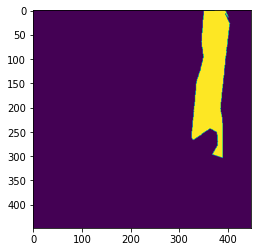

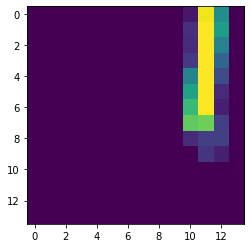

blue jeans behind bench
Jeans
blue jean


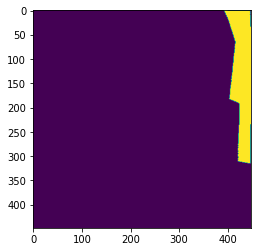

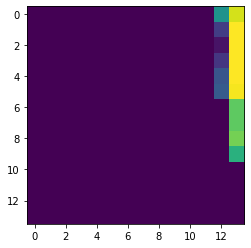

person in orange
orange top rite
orange jacket


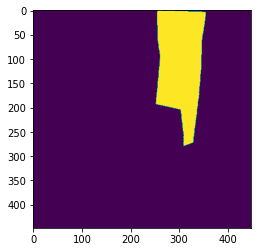

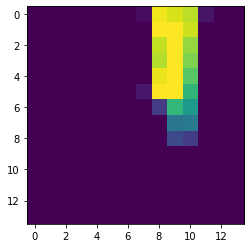

person with red backpack
Red backpack
red backpack


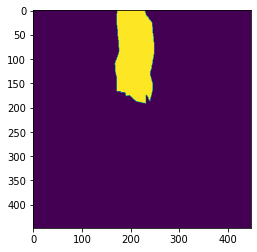

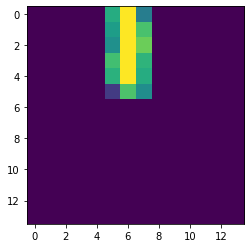

white shirt
man white shirt middle
person in the white shirt


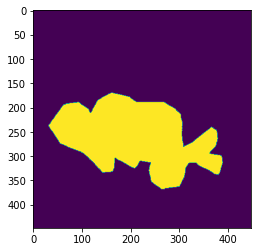

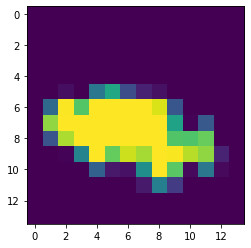

person on stretcher
person lying down
laying down


In [8]:
mask_data = {}
for split in ["train", "val"]:
    ref_ids = refer.getRefIds(split=split)
    for ref_id in ref_ids:
        ref = refer.Refs[ref_id]
        image_id = ref["image_id"]
        file_name = ref['file_name']
        if image_id == 278371:
#             print(f'processing file_name: {file_name}')
            mask = refer.getMask(ref)["mask"]
            mask_ = cv2.resize(mask, (448, 448))
            if image_id not in mask_data:
                mask_data[image_id] = {}

            img = np.zeros((grid_dim, grid_dim))

            indices = []
            values = []
            for i in range(grid_dim):
                for j in range(grid_dim):
                    num = 448//grid_dim
                    pixel = np.sum(mask_[i*num:i*num+num, j*num:j*num+num])/(num*num)
                    img[i, j] = pixel
                    if pixel > 0: 
                        indices.append(i + j*grid_dim)
                        values.append(1)
    
            #plt.imshow(mask)
            #plt.show()
            plt.imshow(mask_)
            plt.show()
            plt.imshow(img)
            plt.show()
            for sent, sent_id in zip(ref["sentences"], ref["sent_ids"]):
                mask_data[image_id][sent_id] = (indices, values)
                print(sent['raw'])
        

In [6]:
count = {}
for split in ["train", "val"]:
    ref_ids = refer.getRefIds(split=split)
    count[split] = 0
    for ref_id in ref_ids:
        ref = refer.Refs[ref_id]
        image_id = ref["image_id"]
        count[split] += 1
print(count)

{'train': 42404, 'val': 3811}


In [7]:
print(len(mask_data))

18494


In [8]:
with open(f'/home/kanishk/Documents/research/vilbert/vilbert-multi-task/data/datasets/refcoco/phrase_grid_{grid_dim}.json', 'w') as j:
    json.dump(mask_data, j)